In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/sharansmenon/aquarium-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hiteshraa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sharansmenon/aquarium-dataset


100%|██████████| 68.0M/68.0M [00:00<00:00, 219MB/s]


In [3]:
import os
import random
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [4]:
!pip install pycocotools

In [5]:
train_dir = "/content/aquarium-dataset/Aquarium Combined/train"
test_dir = "/content/aquarium-dataset/Aquarium Combined/test"
valid_dir = "/content/aquarium-dataset/Aquarium Combined/valid"

In [6]:
# Load the annotations from JSON file
json_path = os.path.join(train_dir, '_annotations.coco.json')

In [7]:
print(json_path)

/content/aquarium-dataset/Aquarium Combined/train/_annotations.coco.json


In [8]:
with open(json_path) as f:
  annotations = json.load(f)

In [9]:
# Mapping of category IDs to names
category_name = {cat['id'] : cat['name'] for cat in annotations['categories']}

In [10]:
category_name

{0: 'creatures',
 1: 'fish',
 2: 'jellyfish',
 3: 'penguin',
 4: 'puffin',
 5: 'shark',
 6: 'starfish',
 7: 'stingray'}

In [11]:
# Mapping of Category IDs to names
image_map = {img['id'] : img['file_name'] for img in annotations['images']}

In [12]:
# Get annotations for each image
image_annotations = {}
for ann in annotations["annotations"]:
  img_id = ann['image_id']
  if img_id not in image_annotations:
    image_annotations[img_id] = []
  image_annotations[img_id].append(ann)

In [13]:
# Function to display image with bounding boxes
def visualize_image(img_id):
  img_file = os.path.join(train_dir, image_map[img_id])
  img = Image.open(img_file)
  draw = ImageDraw.Draw(img)

  for ann in image_annotations[img_id]:
    bbox = ann['bbox']
    category_id = ann['category_id']
    class_name = category_name[category_id]

    # Bounding Box Coordinates
    x, y, width, height = bbox
    draw.rectangle([x, y, x+width, y+height], outline = 'red', width = 2)

    # Adjust the text position slightly above the bounding box
    text_x, text_y = x, max(y - 10, 0)

    # Draw text with the larger font
    draw.text((text_x, text_y), class_name, fill='white')

  # Display the image
  plt.figure(figsize = (8, 8))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

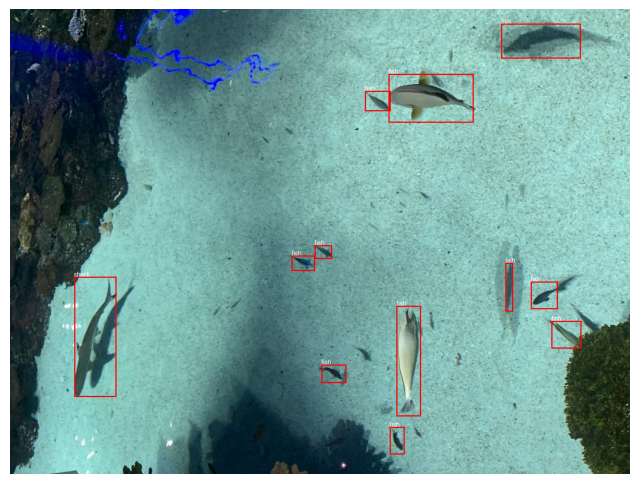

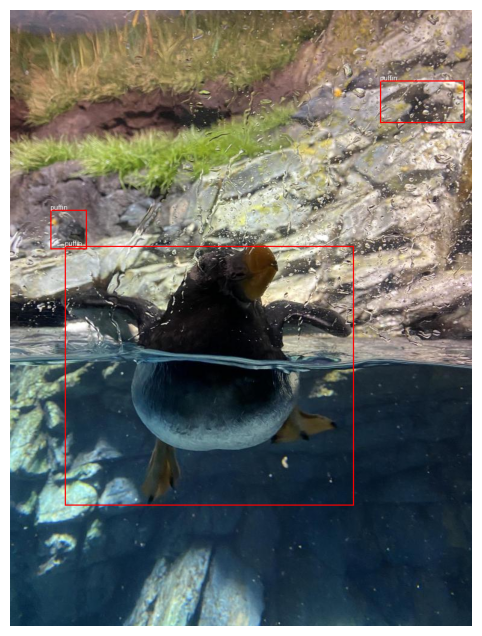

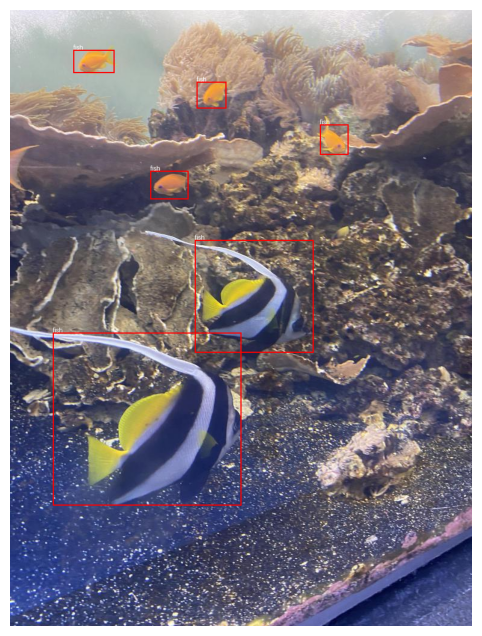

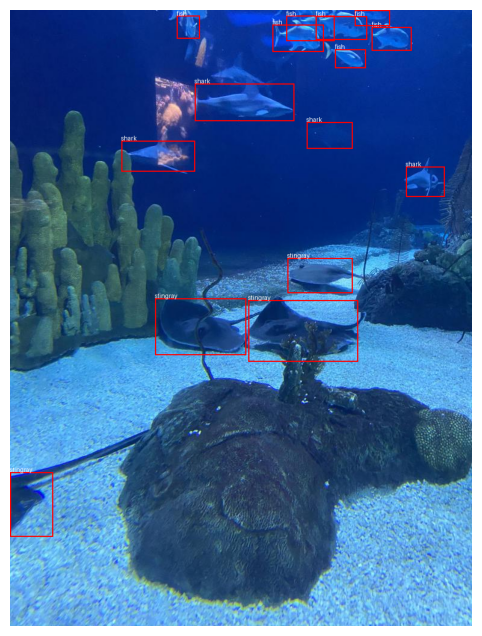

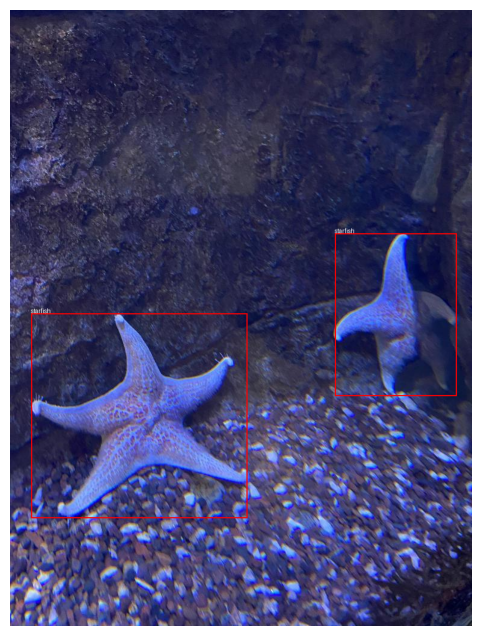

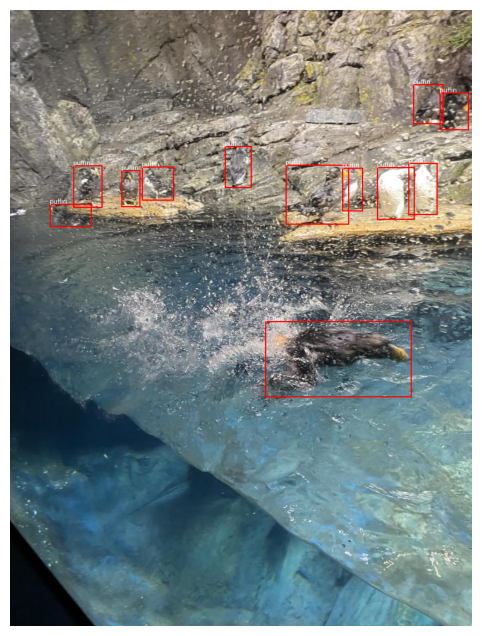

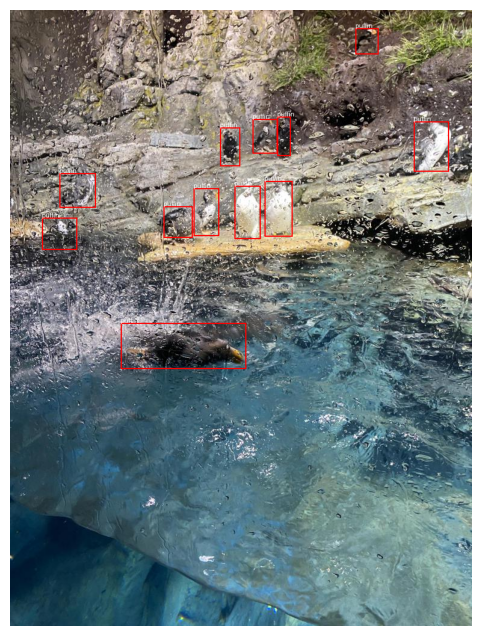

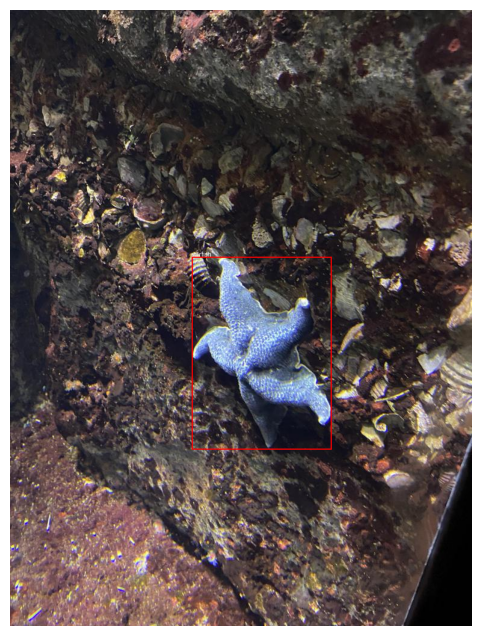

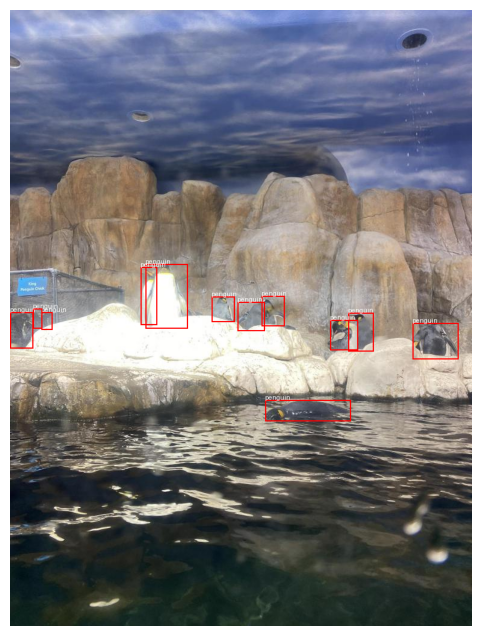

In [14]:
for img_id in list(image_map.keys())[1:10]:
  visualize_image(img_id)

###**Using Pycocotools**

In [15]:
from pycocotools.coco import COCO

annotations_path = os.path.join(train_dir, "_annotations.coco.json")

In [16]:
annotations_path

'/content/aquarium-dataset/Aquarium Combined/train/_annotations.coco.json'

In [17]:
# Load the COCO annotations
def load_coco_annotations(annotations_file):
    return COCO(annotation_file=annotations_file)

In [28]:
import cv2

# Function to visualize image with bounding boxes and labels using OpenCV
def visualize_coco_image(coco, img_dir, img_info):
    img_path = os.path.join(img_dir, img_info['file_name'])

    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Load annotations for this image
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)

    # Draw bounding boxes and class labels
    for ann in anns:
        bbox = ann['bbox']
        category = coco.loadCats(ann['category_id'])[0]['name']

        # COCO Format: BBox = [x_min, y_min, width, height]
        x_min, y_min, width, height = bbox
        x_max, y_max = int(x_min + width), int(y_min + height)

        # Draw the bounding box
        cv2.rectangle(img, (int(x_min), int(y_min)), (x_max, y_max), (0, 0, 255), 2)  # Red color

        # Add the class label on top of the bounding box
        cv2.putText(img, category, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)  # White color

    # Convert BGR image to RGB format for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

In [29]:
def visualize_random_images(coco, img_dir):
    img_ids = coco.getImgIds()
    sample_img_ids = random.sample(img_ids, 5)

    for img_id in sample_img_ids:
        img_info = coco.loadImgs(img_id)[0]
        visualize_coco_image(coco, img_dir, img_info)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


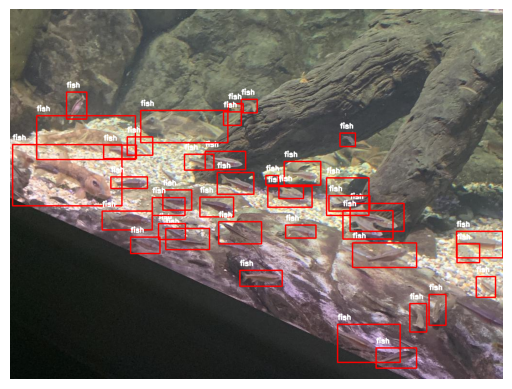

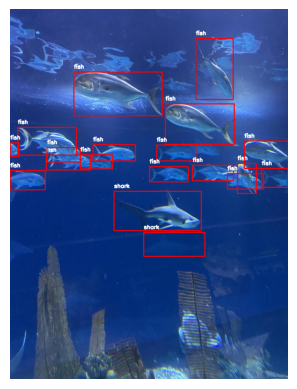

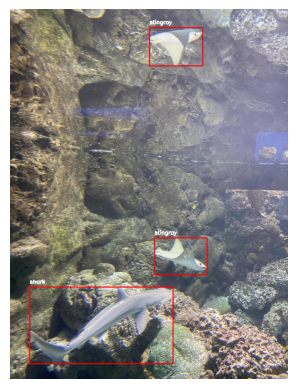

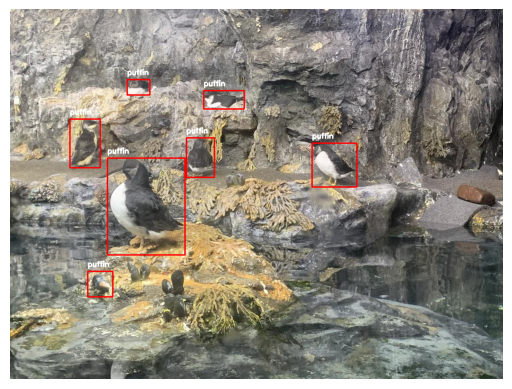

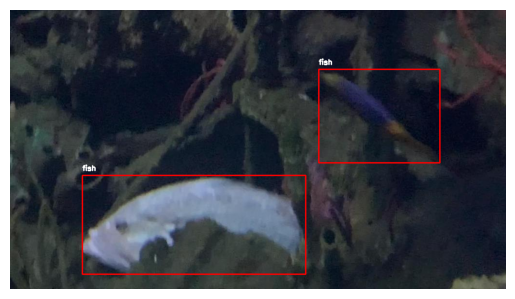

In [30]:
# Load the annotations
coco = load_coco_annotations(annotations_path)

# Visualize random images from the training dataset
visualize_random_images(coco, train_dir)